In [1]:
import pandas as pd
import plotnine as plt
from plotnine import *
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('avocado-updated-2020.csv')

# Step 1

The data includes information on the prices and sales of avacados by year and region. It also segments the sales by small, large, and extra large bags, as well as by type of avacado.

# Step 2

In [3]:
region_mapping = {
    'Albany': 'Northeast',
    'Boston': 'Northeast',
    'Buffalo/Rochester': 'Northeast',
    'Hartford/Springfield': 'Northeast',
    'Baltimore/Washington': 'Northeast',
    'Philadelphia': 'Northeast',
    'Harrisburg/Scranton':'Northeast',
    'New York':'Northeast',
    'Northern New England':'Northeast',
    'Pittsburgh':'Northeast',
    'Richmond/Norfolk':'Northeast',
    'Roanoke':'Northeast',
    'Syracuse':'Northeast',
    'Northeast':'Northeast',

    'Atlanta': 'South',
    'Charlotte': 'South',
    'Dallas/Ft. Worth': 'South',
    'Houston': 'South',
    'Miami/Ft. Lauderdale': 'South',
    'Nashville': 'South',
    'Orlando': 'South',
    'Raleigh/Greensboro': 'South',
    'Jacksonville':'South',
    'Midsouth':'South',
    'New Orleans/Mobile':'South',
    'South Carolina':'South',
    'Southeast':'South',
    'Tampa':'South',

    'Chicago': 'Midwest',
    'Cincinnati/Dayton': 'Midwest',
    'Columbus': 'Midwest',
    'Detroit': 'Midwest',
    'Indianapolis': 'Midwest',
    'Grand Rapids': 'Midwest',
    'Great Lakes': 'Midwest',
    'Louisville': 'Midwest',
    'Plains':'Midwest',
    'South Central':'Midwest',
    'St. Louis':'Midwest',

    'California': 'West',
    'Denver': 'West',
    'Boise': 'West',
    'Phoenix/Tucson': 'West',
    'Portland': 'West',
    'Seattle': 'West',
    'Las Vegas': 'West',
    'San Francisco': 'West',
    'Los Angeles': 'West',
    'San Diego':'West',
    'Sacramento':'West',
    'Spokane':'West',
    'West Tex/New Mexico':'West',
    'West':'West',

    'Total U.S.':'Total'
}

df['region'] = df['geography'].map(region_mapping)

In [4]:
df.rename(columns = {
    '4046':'small', '4225':'large', '4770':'extra large'},
    inplace=True
)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year


# Step 3

In [5]:
organic_2017_df = df[(df['type']=='organic')&(df['year']==2017)&(df['region']!='Total')]
small_avocado = organic_2017_df.groupby('region')['small'].sum()

small_avocado.idxmax(),small_avocado.loc[small_avocado.idxmax()]

('West', 5826061.33)

The region that has the most sales of small Hass avocados in 2017 is West with 5,826,061 in sales.

# Step 4

In [6]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

monthly_average = df.groupby('month')['total_volume'].mean().round(2)
monthly_average.idxmax(),monthly_average.loc[monthly_average.idxmax()]

(5, 1123632.25)

The month with highest average total avocado sales is the fifth month, or May, with 1,123,632 sold.

# Step 5

In [7]:
metro_mapping = {
    'Albany': '1',
    'Boston': '1',
    'Buffalo/Rochester': '1',
    'Hartford/Springfield': '1',
    'Baltimore/Washington': '1',
    'Philadelphia': '1',
    'Harrisburg/Scranton':'1',
    'New York':'0',
    'Northern New England':'1',
    'Pittsburgh':'1',
    'Richmond/Norfolk':'1',
    'Roanoke':'1',
    'Syracuse':'1',
    'Northeast':'0',
    'Atlanta': '1',
    'Charlotte': '1',
    'Dallas/Ft. Worth': '1',
    'Houston': '1',
    'Miami/Ft. Lauderdale': '1',
    'Nashville': '1',
    'Orlando': '1',
    'Raleigh/Greensboro': '1',
    'Jacksonville':'1',
    'Midsouth':'0',
    'New Orleans/Mobile':'1',
    'South Carolina':'1',
    'Southeast':'0',
    'Tampa':'1',
    'Chicago': '1',
    'Cincinnati/Dayton': '1',
    'Columbus': '1',
    'Detroit': '1',
    'Indianapolis': '1',
    'Grand Rapids': '1',
    'Great Lakes': '0',
    'Louisville': '1',
    'Plains':'0',
    'South Central':'0',
    'St. Louis':'1',
    'California': '0',
    'Denver': '1',
    'Boise': '1',
    'Phoenix/Tucson': '1',
    'Portland': '1',
    'Seattle': '1',
    'Las Vegas': '1',
    'San Francisco': '1',
    'Los Angeles': '1',
    'San Diego':'1',
    'Sacramento':'1',
    'Spokane':'1',
    'West Tex/New Mexico':'0',
    'West':'0',

    'Total U.S.':'0'
}

df['metro'] = df['geography'].map(metro_mapping)

#city_average = (df[(df['geography']!='Total U.S.')&(df['geography']!='West')&(df['geography']!='South Central')&
#                    (df['geography']!='California')&(df['geography']!='Northeast')&(df['geography']!='Southeast')&
#                    (df['geography']!='Midsouth')]&(df['geography']!='Plains'))


city_average = (df[df['metro']=='1'])
city_average = city_average.groupby(['geography','metro'])['total_volume'].mean()
#city_average
five_largest_cities = city_average.nlargest(5).reset_index()
five_largest_cities

,geography,metro,total_volume
0,Los Angeles,1,1.567566e+06
1,Dallas/Ft. Worth,1,7.127519e+05
2,Houston,1,6.876533e+05
3,Phoenix/Tucson,1,6.250383e+05
4,Denver,1,4.541332e+05


In [9]:
top5 = df[df['geography'].isin(five_largest_cities['geography'])]

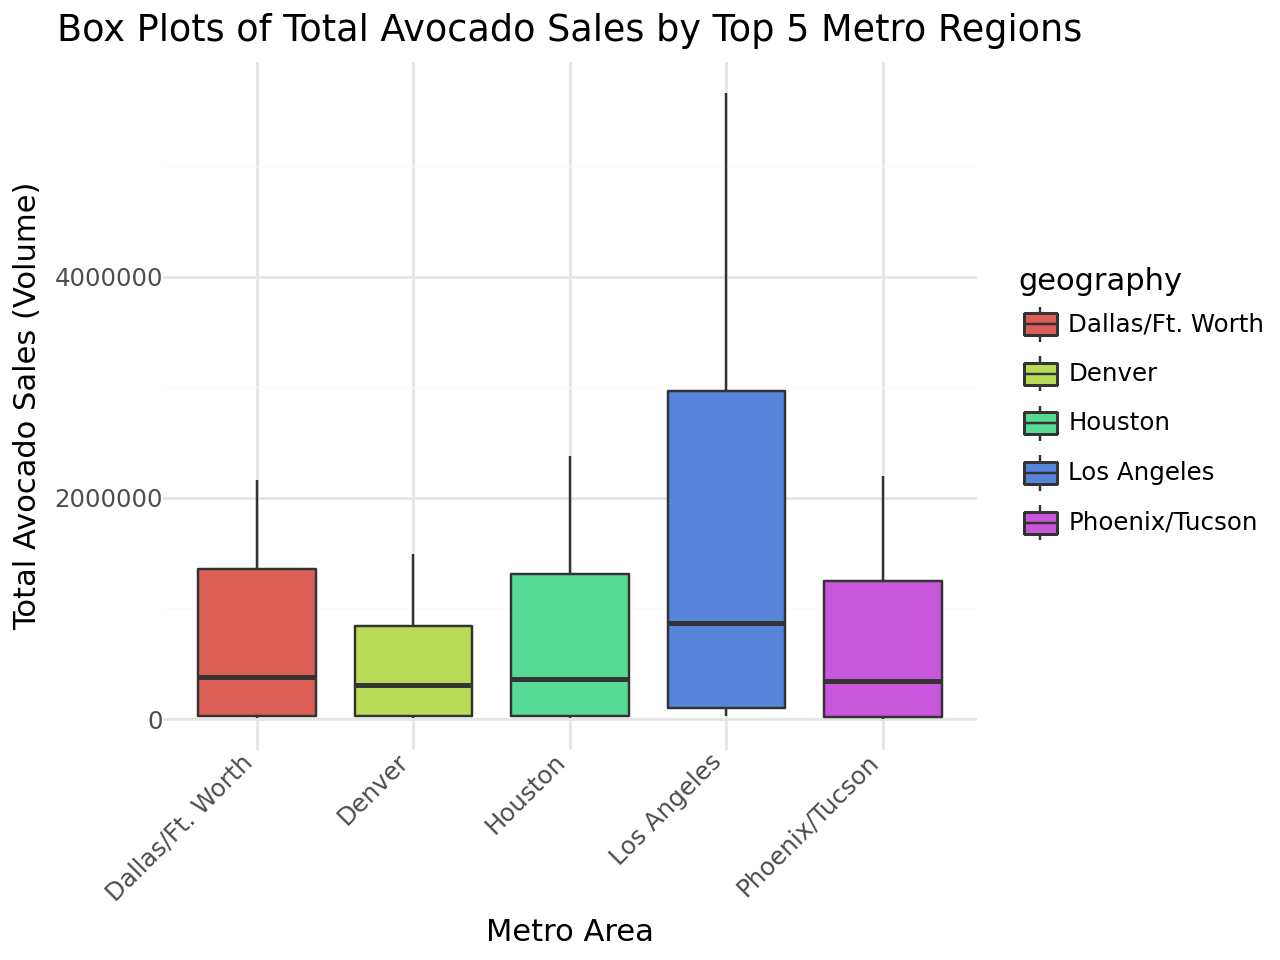

In [15]:
(ggplot(top5, aes(x='geography', y='total_volume', fill='geography'))
            + geom_boxplot()
            + labs(title='Box Plots of Total Avocado Sales by Top 5 Metro Regions',
                   x='Metro Area', 
                   y='Total Avocado Sales (Volume)')
            + theme_minimal()
            + theme(axis_text_x=element_text(angle=45, hjust=1))
            )

# Step 6

In [16]:
california_regions_df = (df[(df['geography']=='Los Angeles')|(df['geography']=='San Diego')|
                    (df['geography']=='San Francisco')|(df['geography']=='Sacramento')])

california_regions_df

,date,average_price,total_volume,small,large,extra large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,month,day,metro
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4,1
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,West,1,4,1
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,West,1,4,1
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,West,1,4,1
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,West,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,West,11,29,1
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,West,11,29,1
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,West,11,29,1
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,West,11,29,1


# Step 7

In [17]:
california_prices = california_regions_df.groupby(["geography", "type"])["average_price"].mean().reset_index()
long_prices_df = california_prices.pivot(index = ["geography"], columns = "type", values = "average_price")
long_prices_df["difference"] = long_prices_df["organic"] - long_prices_df["conventional"]
long_prices_df = long_prices_df.reset_index()

long_prices_df

type,geography,conventional,organic,difference
0,Los Angeles,1.047124,1.574902,0.527778
1,Sacramento,1.295359,1.873856,0.578497
2,San Diego,1.113856,1.798366,0.684510
3,San Francisco,1.400490,2.119444,0.718954


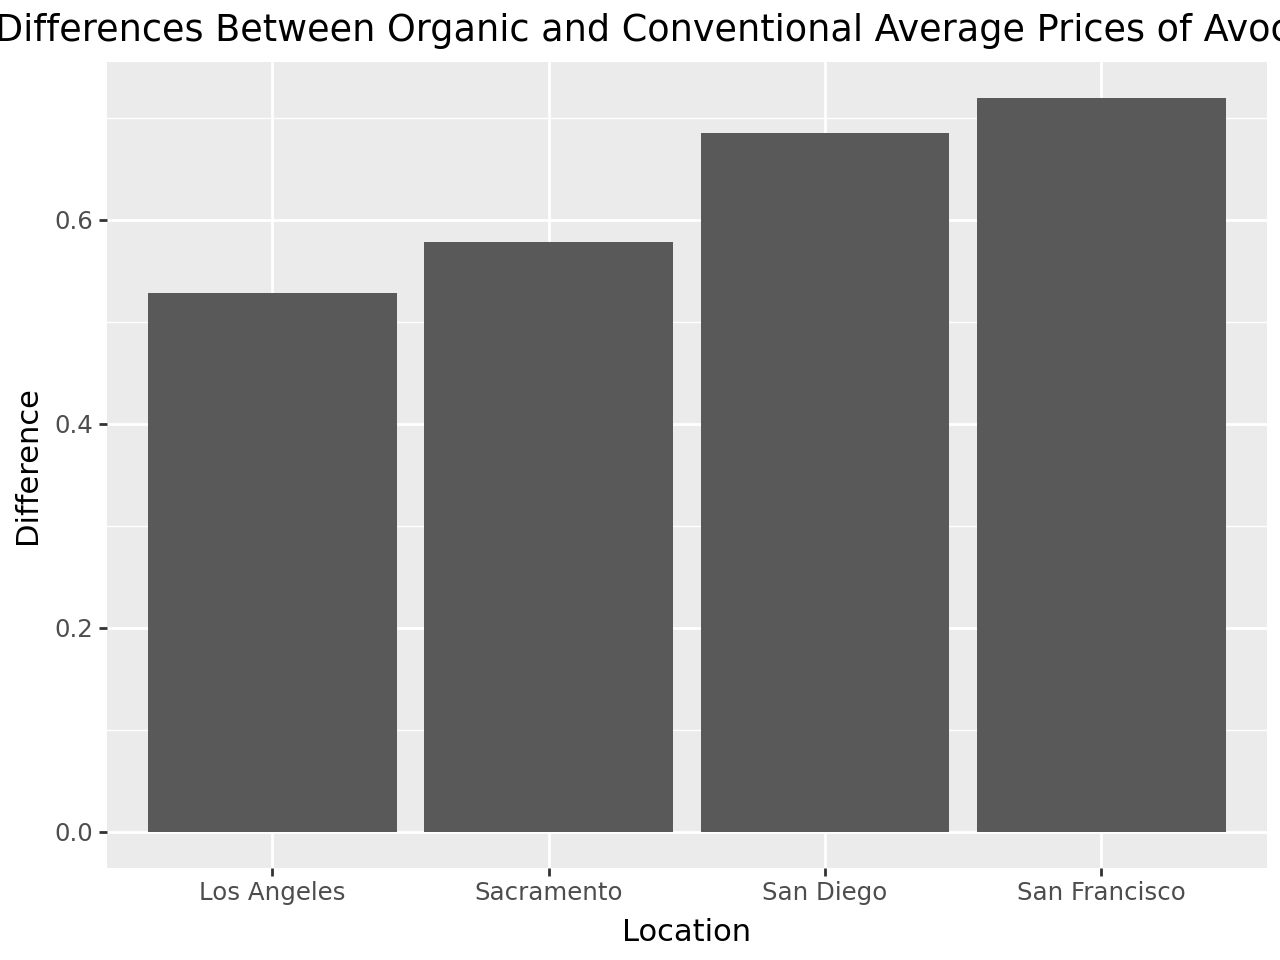

In [18]:
(ggplot(long_prices_df, aes(x='geography', y='difference'))
    + geom_bar(stat = 'identity')
    + labs(x = 'Location', y = 'Difference', title = "Differences Between Organic and Conventional Average Prices of Avocados")
)

San Francisco has the largest difference between Organic and Conventional average prices of avocados.

# Step 8

In [19]:
total_sales_ca = (california_regions_df['small']+california_regions_df['large']+california_regions_df['extra large'])

california_regions_df['small_prop'] = california_regions_df['small']/total_sales_ca
california_regions_df['large_prop'] = california_regions_df['large']/total_sales_ca
california_regions_df['Xlarge_prop'] = california_regions_df['extra large']/total_sales_ca

california_regions_df

california_regions_melt = california_regions_df.melt(
    id_vars = ['geography','type','total_volume'],
    value_vars = ['small_prop','large_prop','Xlarge_prop'],
    var_name = 'size', value_name = 'proportion'
)

<positron-console-cell-19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


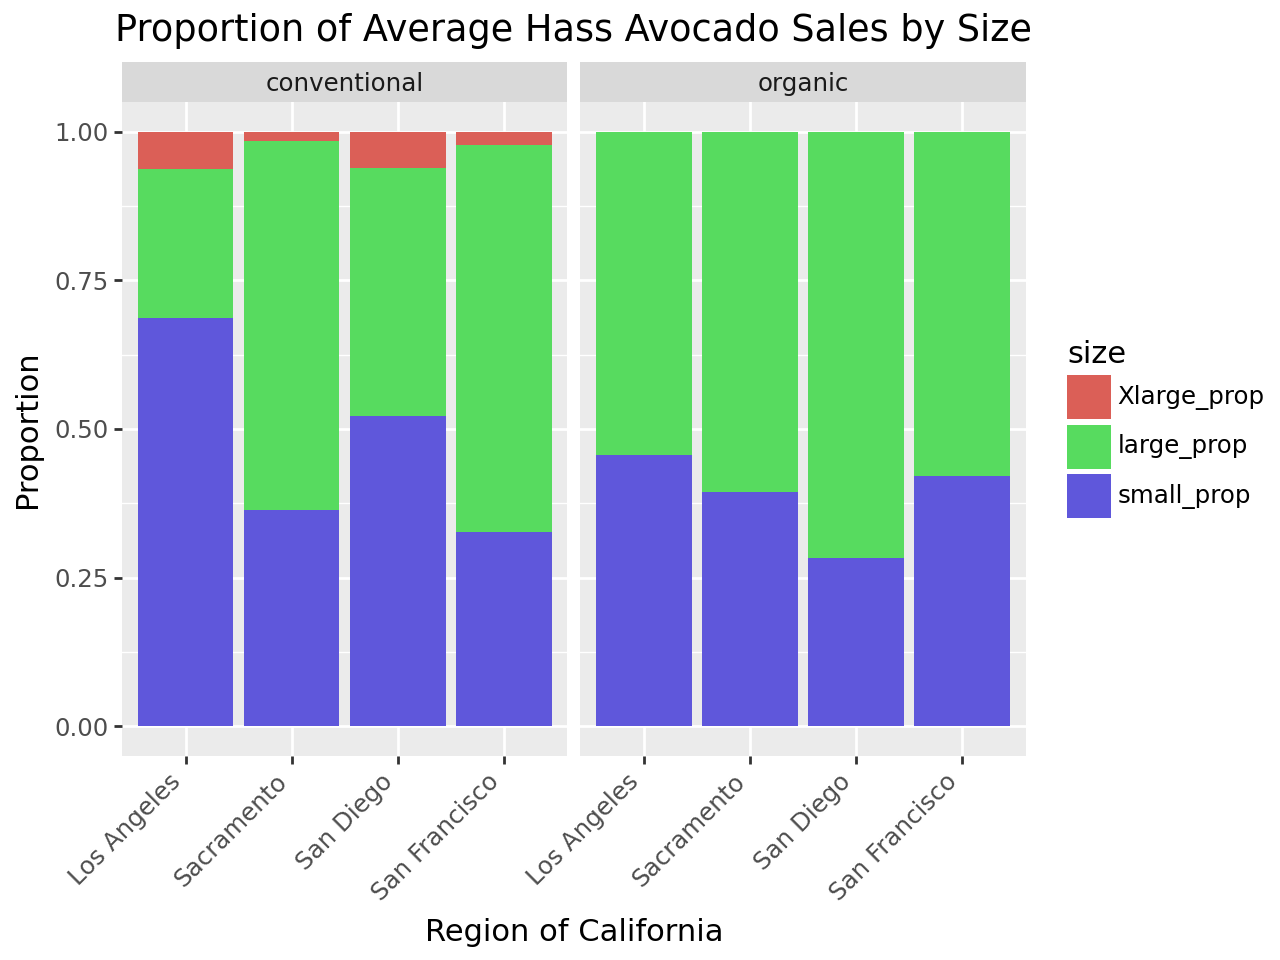

In [20]:
(ggplot(california_regions_melt, aes(x = 'geography',y='proportion', fill='size'))
    + geom_bar(stat='identity',position='fill')
    + facet_wrap('~type')
    + labs(x = 'Region of California', y='Proportion', title = 'Proportion of Average Hass Avocado Sales by Size')
    + theme(axis_text_x = element_text(angle=45, hjust=1))
)

In [22]:
np.random.seed(50)

cities = ['San Francisco', 'San Diego', 'Sacramento', 'Los Angeles']
n_obs_per_city = 100

# Generate data
data = {
    'city': np.repeat(cities, n_obs_per_city),
    'price': np.concatenate([
        np.random.normal(1500000, 300000, n_obs_per_city),
        np.random.normal(900000, 200000, n_obs_per_city),
        np.random.normal(600000, 150000, n_obs_per_city),
        np.random.normal(950000, 250000, n_obs_per_city)
    ])
}

housing_prices_df = pd.DataFrame(data)

combined_df = pd.merge(california_regions_df, housing_prices_df, left_on='geography',right_on='city', how='inner')

In [24]:
avg_avocado_sales = combined_df.groupby('geography')['total_volume'].mean().reset_index()
analysis_data = pd.merge(avg_avocado_sales, housing_prices_df, left_on='geography', right_on='city')

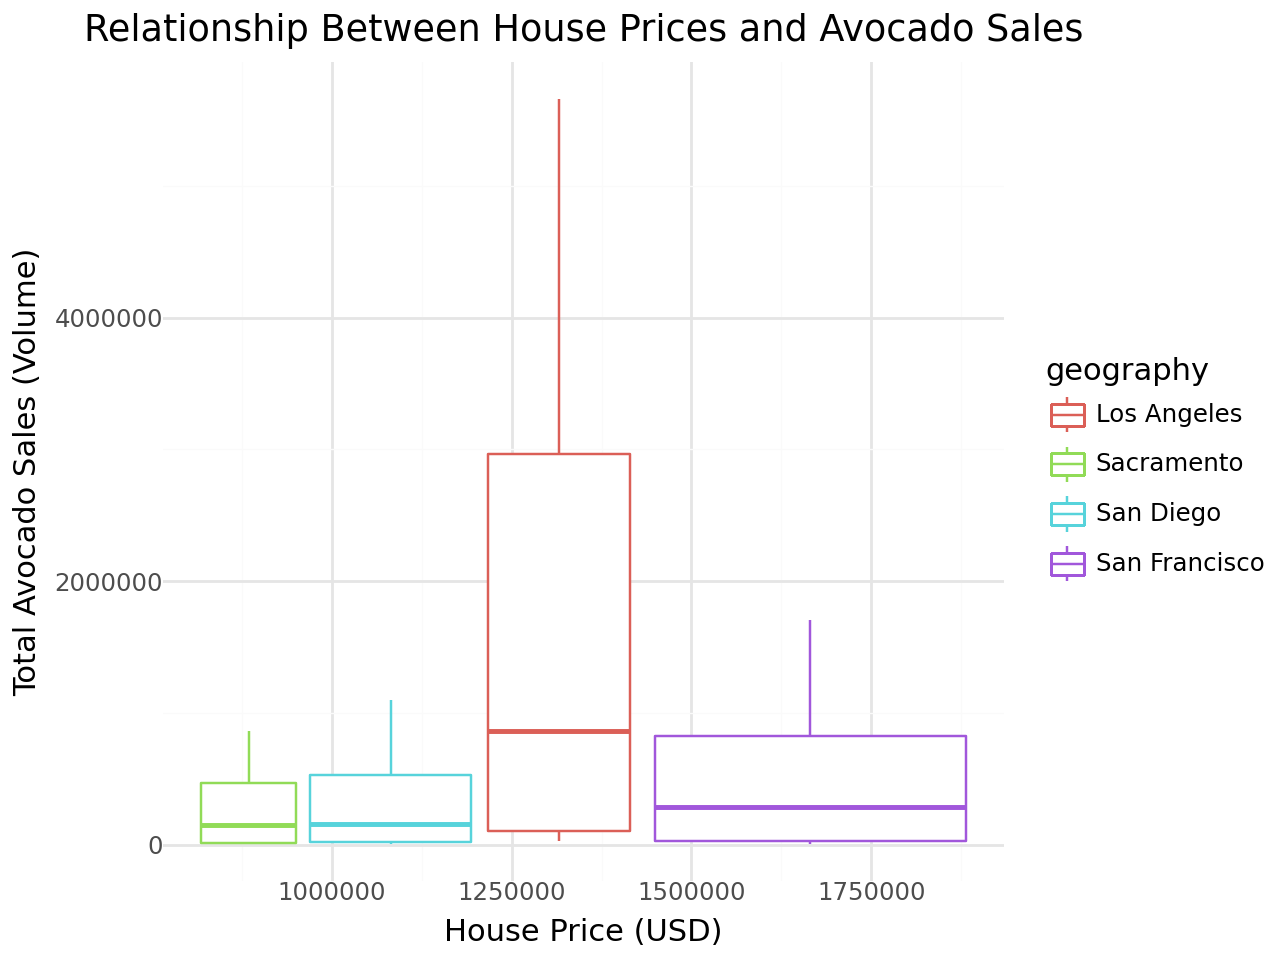

In [25]:
(ggplot(combined_df, aes(x='price', y='total_volume', color='geography'))
                + geom_boxplot()
                + labs(title='Relationship Between House Prices and Avocado Sales',
                       x='House Price (USD)',
                       y='Total Avocado Sales (Volume)')
                + theme_minimal())

As it can be see in the plot above, Los Angeles has the second highest house prices out of the four cities and also has the highest amount of avocado sales by a large margin. San Francisco has the highest housing prices and has the second highest amount of avocados sold. Sacramento has both the lowest housing costs and the lowest amount of avocados sold. So, we can say that there may be some evidence of an association between higher housing costs and more avocados being sold there.

For this assingment, I used Chat GPT to help with some issues that I had when debugging. Several errors were solved by the use of Chat GPT in both filtering the data and creating the visualizations. Also, Chat GPT was used in creating a data set for the housing costs in the different cities. It created a way to simulate values for housing prices in the four cities which I then used to create the visualization in the last question.